In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from earlystop import EarlyStopper
from lstm_models import AirModel, StackLSTM, AirModel_DropOut, AirModelLayers


#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data as data_utils


np.random.seed(seed=77)
torch.manual_seed(77)

In [2]:
#fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file7_080124.mat"
cutoff = [8/1000, 11/1000]

mat = ds.MatFileToDataFrame(fpath, fname)

df_ = mat.get_dataframe(cutoff)

x = dc.CaractDefect(df_)
taus = x.get_tau()[1]

hilbert, _ = x.get_hilbert()

df = pd.merge(df_, hilbert, on = 'Hilbert Transform', how = 'outer')

df.head()

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
0,0.134180,0.023473,0.002203,0.002203-0.001490j,0.002659,-0.594742,-0.051439
1,0.135824,0.025117,0.002051,0.002051+0.000170j,0.002058,0.082612,-0.020024
2,0.136482,0.025775,0.001900,0.001900+0.000303j,0.001924,0.158163,0.009547
3,0.137797,0.027090,0.001749,0.001749+0.000903j,0.001969,0.476669,0.035605
4,0.137797,0.027090,0.001599,0.001599+0.000993j,0.001882,0.555726,0.056848


### **data**

In [3]:
amplitudes = df['Amplitude'][300:300000].values
train, val = utils.split_data(amplitudes)
x_train, y_train = utils.create_dataset(train, 100)
x_val, y_val = utils.create_dataset(val, 100)
train_loader = utils.create_loader(x_train, y_train, 32)
val_loader = utils.create_loader(x_val, y_val, 32)

print(x_train.shape, y_train.shape ,x_val.shape, y_val.shape)

torch.Size([239660, 100, 1]) torch.Size([239660, 100, 1]) torch.Size([59840, 100, 1]) torch.Size([59840, 100, 1])


## **model**


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0, Train Loss: 0.0070512173652511525, Test Loss: 0.0022002563917048194
Epoch: 0, Loss: 0.0028870292007923126


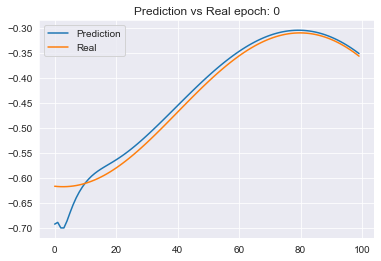

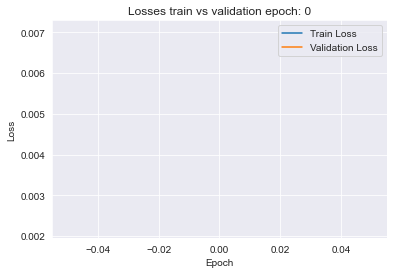

 10%|█         | 2/20 [18:50<2:47:11, 557.33s/it]

Epoch: 2, Train Loss: 0.0012111928623465907, Test Loss: 0.0010541086739743438
Epoch: 2, Loss: 0.0013749751960858703


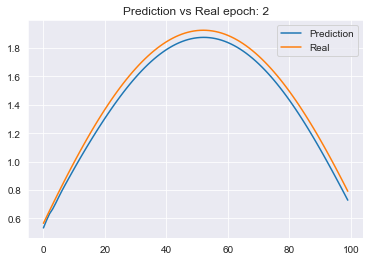

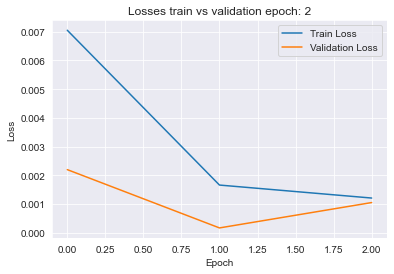

 20%|██        | 4/20 [36:50<2:26:34, 549.66s/it]

Epoch: 4, Train Loss: 0.0007918248025331154, Test Loss: 7.464185220212426e-05
Epoch: 4, Loss: 0.0005431649624370039


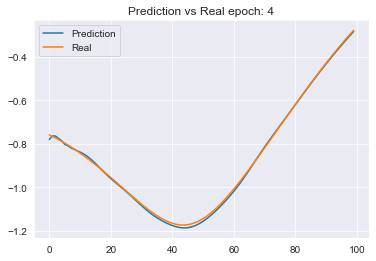

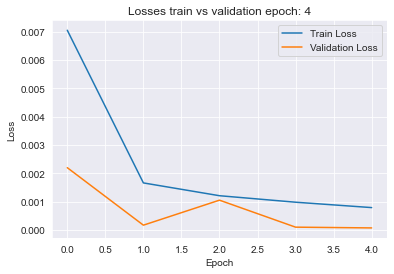

 30%|███       | 6/20 [57:17<2:16:57, 586.98s/it]

Early stopping, saving checkpoint of 5
Epoch: 6, Train Loss: 0.0005671539469012799, Test Loss: 0.0003158305252993723
Epoch: 6, Loss: 0.00031655002385377884


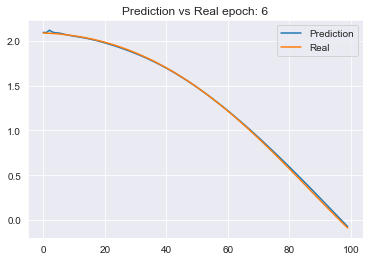

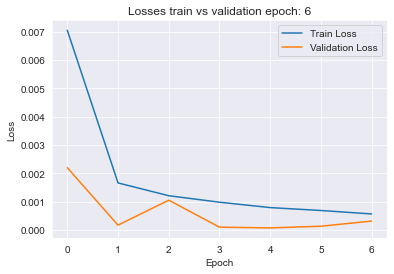

 35%|███▌      | 7/20 [1:06:37<2:05:16, 578.16s/it]

Early stopping, saving checkpoint of 6


 40%|████      | 8/20 [1:15:50<1:54:00, 570.07s/it]

Early stopping, saving checkpoint of 7
Epoch: 8, Train Loss: 0.000501659971492877, Test Loss: 0.0003489569654987993
Epoch: 8, Loss: 0.0004031442804262042


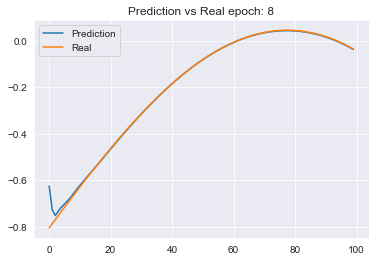

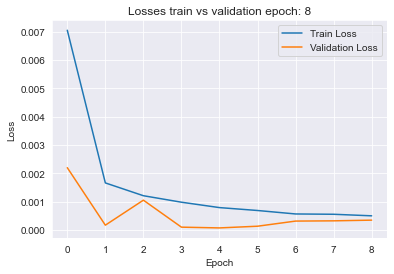

 45%|████▌     | 9/20 [1:24:47<1:42:38, 559.89s/it]

Early stopping, saving checkpoint of 8


 50%|█████     | 10/20 [1:33:31<1:31:26, 548.67s/it]

Early stopping, saving checkpoint of 9
Epoch: 10, Train Loss: 0.0004271129383410632, Test Loss: 0.0010502342308092026
Epoch: 10, Loss: 0.0001833855058066547


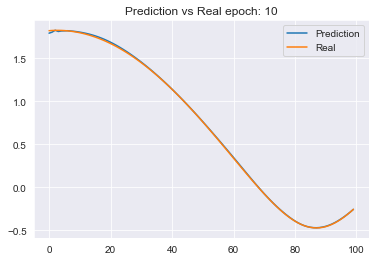

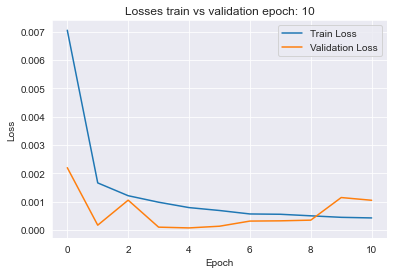

 55%|█████▌    | 11/20 [1:42:26<1:21:40, 544.46s/it]

Early stopping, saving checkpoint of 10


 60%|██████    | 12/20 [1:51:28<1:12:31, 543.93s/it]

Early stopping, saving checkpoint of 11
Epoch: 12, Train Loss: 0.0003576866480529551, Test Loss: 0.003924140021177557
Epoch: 12, Loss: 0.00032778625609353185


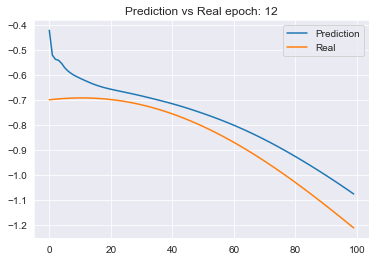

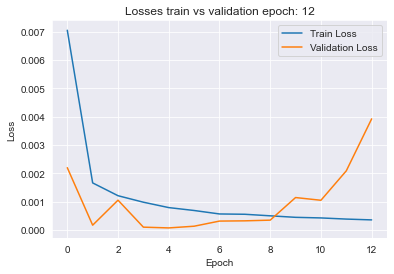

 65%|██████▌   | 13/20 [2:00:19<1:02:59, 539.97s/it]

Early stopping, saving checkpoint of 12


 70%|███████   | 14/20 [2:09:12<53:45, 537.65s/it]  

Early stopping, saving checkpoint of 13
Epoch: 14, Train Loss: 0.0003157460579101664, Test Loss: 0.023293108390494782
Epoch: 14, Loss: 0.0001360911555821076


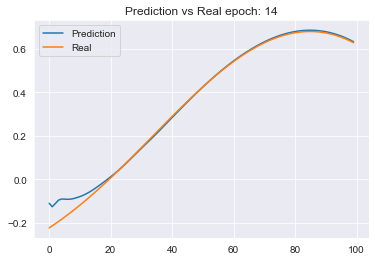

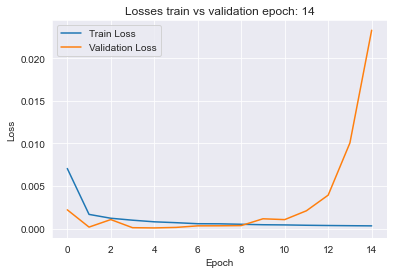

 75%|███████▌  | 15/20 [2:18:08<44:46, 537.29s/it]

Early stopping, saving checkpoint of 14


 80%|████████  | 16/20 [2:29:23<38:34, 578.62s/it]

Early stopping, saving checkpoint of 15
Epoch: 16, Train Loss: 0.0002911251887346252, Test Loss: 0.08276334550171931
Epoch: 16, Loss: 0.00014368980191648006


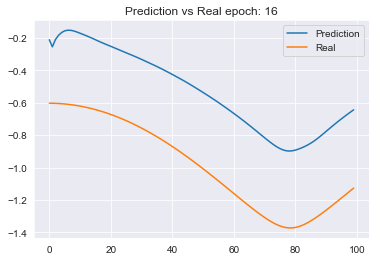

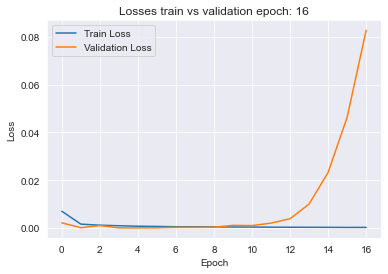

 85%|████████▌ | 17/20 [2:42:25<31:59, 639.92s/it]

Early stopping, saving checkpoint of 16


 90%|█████████ | 18/20 [2:53:03<21:18, 639.40s/it]

Early stopping, saving checkpoint of 17
Epoch: 18, Train Loss: 0.00024093914138835056, Test Loss: 0.20599655703028893
Epoch: 18, Loss: 0.00014198222197592258


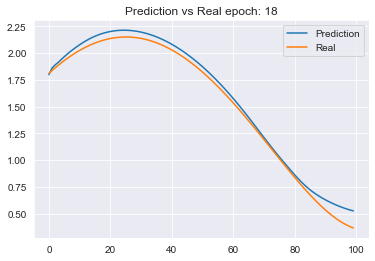

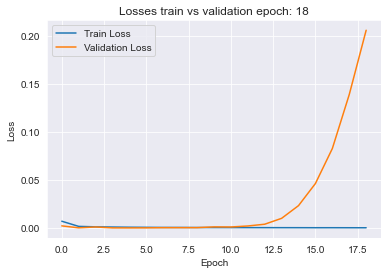

 95%|█████████▌| 19/20 [3:02:13<10:12, 612.33s/it]

Early stopping, saving checkpoint of 18


 95%|█████████▌| 19/20 [3:04:23<09:42, 582.31s/it]


Training interrupted by user


In [4]:
model = AirModelLayers(3, dropout = 0.3)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
n_epochs = 20
ncheckpoint = 2

m, av_train, av_val = utils.train_model(model, optimizer, criterion, train_loader, val_loader, n_epochs, ncheckpoint)

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(av_train)), y=av_train, mode='lines', name='av_train'))
fig.add_trace(go.Scatter(x=np.arange(len(av_val)), y=av_val, mode='lines', name='av_val'))
fig.show()


In [6]:
np.argmin(av_train), np.argmin(av_val)

(18, 4)

## **testing**

In [7]:
fname = "file1_050124.mat"
cutoff = [8/1000, 11/1000]

mat = ds.MatFileToDataFrame(fpath, fname)

df_ = mat.get_dataframe(cutoff)

x = dc.CaractDefect(df_)
taus = x.get_tau()[1]

hilbert, _ = x.get_hilbert()

df = pd.merge(df_, hilbert, on = 'Hilbert Transform', how = 'outer')

df.head()

,Original Signal,Signal - Mean,Filtered Signal,Hilbert Transform,Amplitude,Instantaneous Phase,Gradient Phase
0,2.256644,0.049758,0.007786,0.007786-0.004629j,0.009058,-0.536394,-0.056599
1,2.258288,0.051402,0.007361,0.007361+0.000726j,0.007397,0.098350,-0.028915
2,2.260261,0.053375,0.006933,0.006933+0.001102j,0.007020,0.157607,-0.002832
3,2.260918,0.054033,0.006502,0.006502+0.003041j,0.007178,0.437517,0.020193
4,2.262233,0.055348,0.006068,0.006068+0.003316j,0.006915,0.500092,0.039028


In [8]:
amplitudes = df['Amplitude'][300:30000].values

train, val = utils.split_data(amplitudes)
val, test = utils.split_data(val, 0.5)

x_train, y_train = utils.create_dataset(train, 100)
x_val, y_val = utils.create_dataset(val, 100)
x_test, y_test = utils.create_dataset(test, 100)

train_loader = utils.create_loader(x_train, y_train, 32)
val_loader = utils.create_loader(x_val, y_val, 32)
test_loader = utils.create_loader(x_test, y_test, 32)

print(train_loader.dataset.tensors[0].shape, val_loader.dataset.tensors[0].shape, test_loader.dataset.tensors[0].shape)

torch.Size([23660, 100, 1]) torch.Size([2870, 100, 1]) torch.Size([2870, 100, 1])


In [9]:
model_trained = AirModelLayers(n_layers=3, dropout = 0.25)
optimizer_trained = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [10]:
#cargo modelo
utils.resume(model_trained, optimizer_trained, 'earlystop_5.pth')

In [11]:
x = utils.predictions(model_trained, val_loader)

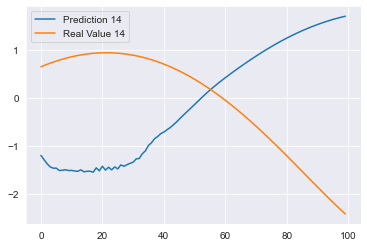

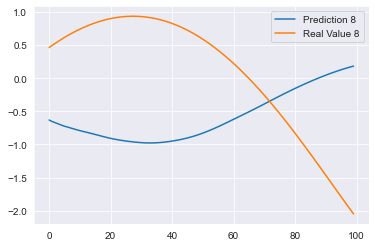

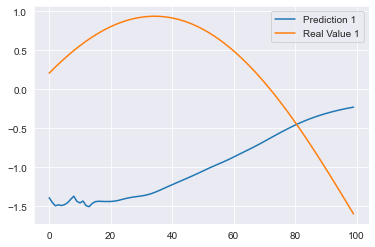

In [12]:
#x = utils.predictions(model_trained, val_loader) 
#Select 3 random indices
random_indices = np.random.choice(len(x), size=3, replace=False)

# Plot the selected predictions and real values
for i in random_indices:
    plt.figure()  # Create a new figure for each iteration
    plt.plot(np.arange(len(x[i])), x[i], label=f'Prediction {i}')
    plt.plot(np.arange(len(y_test[i])), y_test[i], label=f'Real Value {i}')
    plt.legend()
    plt.show()


## **second training**



In [13]:
n_epochs = 50
ncheckpoint = 3

m2, av_train, av_val = utils.train_model(model_trained, optimizer_trained, criterion, train_loader, val_loader, n_epochs, ncheckpoint)

  0%|          | 0/50 [00:00<?, ?it/s]

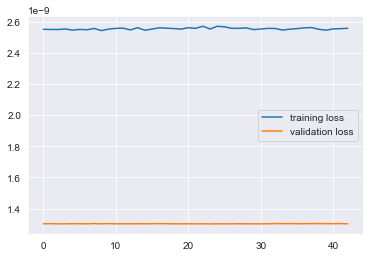

In [39]:
plt.plot(av_train, label='training loss')
plt.plot(av_val, label='validation loss')
plt.legend()
plt.show()

## **load and test model**

In [43]:
model_trained2 = AirModelLayers(n_layers=3, dropout = 0.25)
optimizer_trained2 = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

#cargo modelo
utils.resume(model_trained2, optimizer_trained2, 'checkpoint_10.pth')

In [44]:
x = utils.predictions(model_trained2, test_loader)

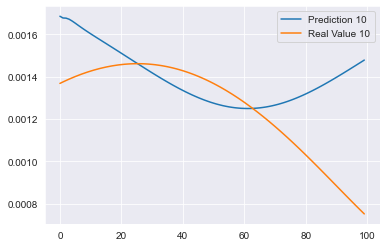

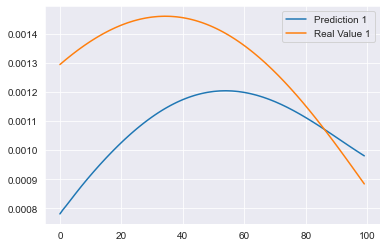

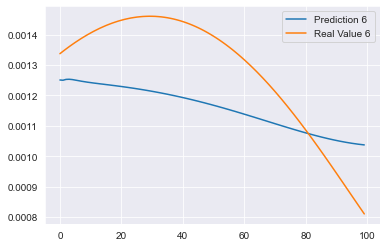

In [46]:
#Select 3 random indices
random_indices = np.random.choice(len(x), size=3, replace=False)

# Plot the selected predictions and real values
for i in random_indices:
    plt.figure()  # Create a new figure for each iteration
    plt.plot(np.arange(len(x[i])), x[i], label=f'Prediction {i}')
    plt.plot(np.arange(len(y_test[i])), y_test[i], label=f'Real Value {i}')
    plt.legend()
    plt.show()